# Model Testing Code

This code is used to test the model with your own video and generates relative results and figure at the end.

## Enter Input File Name Here

In [37]:
vid='hmdb/test/t5.mp4'

## Then press shift+end till the end of the document. Result will be saved to 'result/'/

## Load Model

Please put model folder (named hmdbmodel2) in the same directory with this file.

In [2]:
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.metrics as metrices
import seaborn as sns
from video_to_numpy import video_to_numpy
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import random
import json
from datetime import datetime

In [3]:
str(datetime.now()).replace(':','_')

'2020-04-02 22_55_16.401499'

In [4]:
reg_val  = 0.001
input_shape=(15, 224, 224, 3)
def create_model():
    model = models.Sequential()
    model.add(layers.TimeDistributed(layers.Conv2D(32, (7, 7), strides=(2, 2), padding='same',activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(l=reg_val)),
                              input_shape=input_shape))
    model.add(layers.TimeDistributed(layers.BatchNormalization()))
    model.add(layers.TimeDistributed(layers.Conv2D(32, (3,3),activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=reg_val))))
    model.add(layers.TimeDistributed(layers.BatchNormalization()))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2))))
    model.add(layers.TimeDistributed(layers.Conv2D(64, (3, 3), padding='same',activation='relu',
                                      kernel_regularizer=tf.keras.regularizers.l2(l=reg_val))))
    model.add(layers.TimeDistributed(layers.BatchNormalization()))
    model.add(layers.TimeDistributed(layers.Conv2D(64, (3, 3), padding='same',activation='relu',
                                      kernel_regularizer=tf.keras.regularizers.l2(l=reg_val))))
    model.add(layers.TimeDistributed(layers.BatchNormalization()))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2))))
    model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), padding='same',activation='relu',
                                      kernel_regularizer=tf.keras.regularizers.l2(l=reg_val))))
    model.add(layers.TimeDistributed(layers.BatchNormalization()))
    model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), padding='same',activation='relu',
                                      kernel_regularizer=tf.keras.regularizers.l2(l=reg_val))))
    model.add(layers.TimeDistributed(layers.BatchNormalization()))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2))))
    model.add(layers.TimeDistributed(layers.Flatten()))
    model.add(layers.LSTM(256, dropout=0.5))
    model.add(layers.Dense(2, activation='softmax'))

    return model

In [5]:
model=create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss='hinge',
              metrics=['accuracy'])
model.load_weights('./model/proj5')

## Preprocess Video

In [38]:
fname=vid
if fname.rfind('/')!=-1:
    fname=fname[fname.rfind('/')+1:]

In [39]:
output_dir='testimg/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
elif len(listdir(output_dir))!=0:
    output_dir=str(datetime.now()).replace(':','_')+output_dir
    os.makedirs(output_dir)
video_to_numpy(vid,output_dir,temporal_dimension=15)

In [40]:
#output_dir=r"D:\Download\ss\2020-04-02 22_36_12.431255testimg"

In [41]:
imgs=[join(output_dir, f) for f in listdir(output_dir) if isfile(join(output_dir, f))]

In [42]:
X=None
ypc=0
for i in imgs:
    Xtmp=np.load(i)
    if X is None:
        X=Xtmp
    else:
        X=np.concatenate([X,Xtmp])
    ypc+=Xtmp.shape[0]

In [43]:
X.shape

(602, 15, 224, 224, 3)

In [44]:
#X=X.astype('int')

In [45]:
Xf=X.astype('float32')

In [46]:
#Xf=tf.cast(X, tf.float32)

In [47]:
# cv2.imshow('qwe',Xf[350,0,:,:,:])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [48]:
result=model.predict(Xf,batch_size=16)

In [49]:
result

array([[0.97406805, 0.0259319 ],
       [0.9788284 , 0.0211716 ],
       [0.97897196, 0.02102803],
       ...,
       [0.9945251 , 0.00547489],
       [0.9941801 , 0.00581997],
       [0.99042344, 0.00957656]], dtype=float32)

In [50]:
json_out={}
result_list=[]
for i in range(result.shape[0]):
    result_list.append([(i/30),result[i,0]])
json_out["punch"]=result_list

In [51]:
json_out

{'punch': [[0.0, 0.97406805],
  [0.03333333333333333, 0.9788284],
  [0.06666666666666667, 0.97897196],
  [0.1, 0.97920084],
  [0.13333333333333333, 0.9794295],
  [0.16666666666666666, 0.9796544],
  [0.2, 0.9664462],
  [0.23333333333333334, 0.9615573],
  [0.26666666666666666, 0.9612885],
  [0.3, 0.9624207],
  [0.3333333333333333, 0.96387225],
  [0.36666666666666664, 0.96798295],
  [0.4, 0.9745544],
  [0.43333333333333335, 0.97049487],
  [0.4666666666666667, 0.9755234],
  [0.5, 0.97685665],
  [0.5333333333333333, 0.97800064],
  [0.5666666666666667, 0.9794407],
  [0.6, 0.9807765],
  [0.6333333333333333, 0.9822901],
  [0.6666666666666666, 0.9876801],
  [0.7, 0.98784095],
  [0.7333333333333333, 0.9878967],
  [0.7666666666666667, 0.9880518],
  [0.8, 0.9881542],
  [0.8333333333333334, 0.98844075],
  [0.8666666666666667, 0.9886972],
  [0.9, 0.98893666],
  [0.9333333333333333, 0.9888938],
  [0.9666666666666667, 0.9888565],
  [1.0, 0.98896],
  [1.0333333333333334, 0.9892251],
  [1.06666666666666

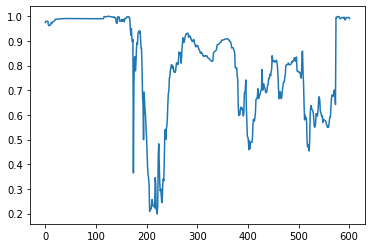

In [52]:
plt.plot(result[:,0])
plt.savefig('result/'+fname+'.png')

In [53]:
result[:,0].shape[0]

602

In [54]:
with open('result/'+fname+'.json', 'w+') as outfile:
    json.dump(str(json_out), outfile)